In [2]:
from scipy import signal
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import matplotlib
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
from collections import OrderedDict

majorLocator   = MultipleLocator(20)
majorFormatter = FormatStrFormatter('%d')
minorLocator   = MultipleLocator(5)

def db2mag(x):
    if isinstance(x, list):
        return [db2mag(val) for val in x]
    return 10**(x/20)

def hz_to_sample(x, sample_rate):
    if isinstance(x, list):
        return [hz_to_sample(x, sample_rate) for val in x]
    return x * (2*np.pi / sample_rate)

def sample_to_hz(x, sample_rate):
    if isinstance(x, list):
        return [sample_to_hz(x, sample_rate) for val in x]
    
    return (sample_rate/2)*(x / (np.pi))

%pylab inline

# Forçar o uso de LaTeX
from matplotlib import rc
##rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20) 

sample_rate = 5
nyquist = sample_rate/2
freqs = [x*1e-3 for x in linspace(0,9,1000)]
gains = [1] * len(freqs)
for freq in linspace(9, 50, 1000):
    freqs.append(freq*1e-3)
    gains.append(-80)

freqs[-1] = nyquist
gains[-1] = 0

gains_nodb = gains
gains = db2mag(gains)
gains[-1] = 0

Populating the interactive namespace from numpy and matplotlib


In [3]:
f, g = freqs[:-1], gains[:-1]

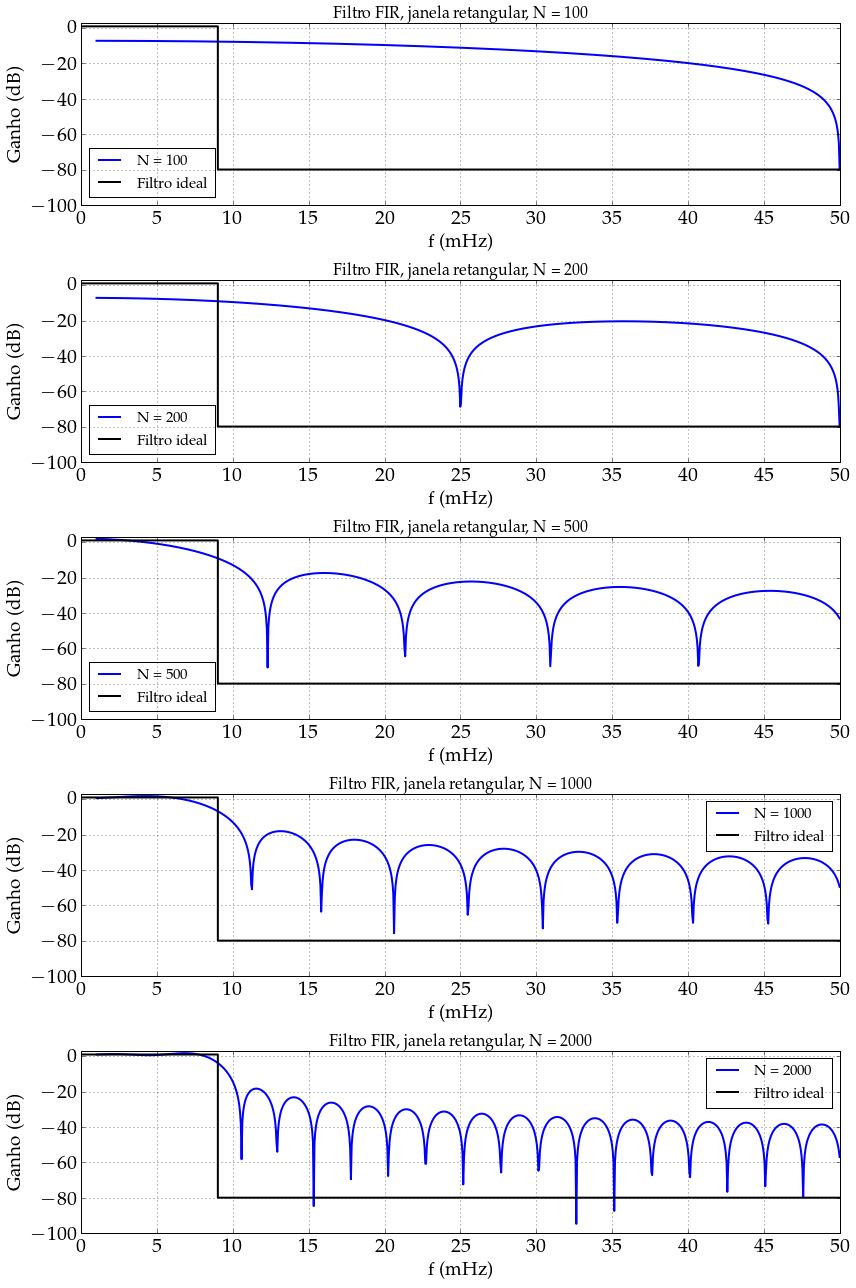

In [25]:
fig = plt.figure(1, figsize=(12,18))
freq_range = np.linspace(hz_to_sample(1e-3, sample_rate), hz_to_sample(50e-3, sample_rate), 1000)
leg = []

for (pos, tap_number) in enumerate([100, 200, 500, 1000, 2000]):
    plt.subplot(511 + pos)
    b = signal.firwin2(tap_number, freqs, gains, nyq=nyquist, window='boxcar')
    w, h = signal.freqz(b, worN=freq_range)
    w = sample_to_hz(w, sample_rate)
    plt.plot(w * 1000, 20 * np.log10(abs(h)), linewidth=2)
    plt.plot(1000*np.array(f), 20*np.log10(g), 'k-', linewidth=2)
    leg = ["N = {}".format(tap_number), "Filtro ideal"]
    plt.grid()
    plt.title('Filtro FIR, janela retangular, N = {}'.format(tap_number), fontsize=16)
    plt.legend(leg, loc="best", fontsize=15)
    plt.xlabel('f (mHz)', fontsize=19)
    plt.xticks(range(0, 55, 5))
    plt.ylim([-100, 3])
    plt.ylabel('Ganho (dB)', fontsize=19)

#plt.subplot(616)
#plt.legend(["Filtro ideal"])
plt.tight_layout()
#plt.grid()
plt.savefig('lowpass_FIR_rectangular_window_v2.eps')

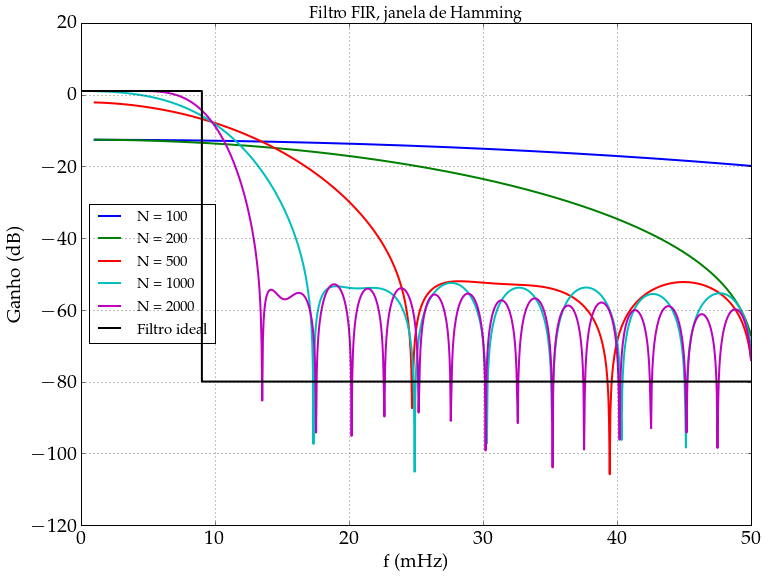

In [94]:
fig = plt.figure(1, figsize=(12,9))
freq_range = np.linspace(hz_to_sample(1e-3, sample_rate), hz_to_sample(50e-3, sample_rate), 1000)
leg = []

for tap_number in [100, 200, 500, 1000, 2000]:
    b = signal.firwin2(tap_number, freqs, gains, nyq=nyquist, window='hamming')
    w, h = signal.freqz(b, worN=freq_range)
    w = sample_to_hz(w, sample_rate)
    plt.plot(w * 1000, 20 * np.log10(abs(h)), linewidth=2)
    leg.append("N = {}".format(tap_number))

plt.plot(1000*np.array(f), g, 'k-', linewidth=2)
leg.append("Filtro ideal")
plt.grid()
plt.title('Filtro FIR, janela de Hamming', fontsize=16)
plt.legend(leg, loc="best", fontsize=15)
plt.xlabel('f (mHz)', fontsize=19)
plt.ylabel('Ganho (dB)', fontsize=19)
plt.savefig('lowpass_FIR_hamming_window.eps')

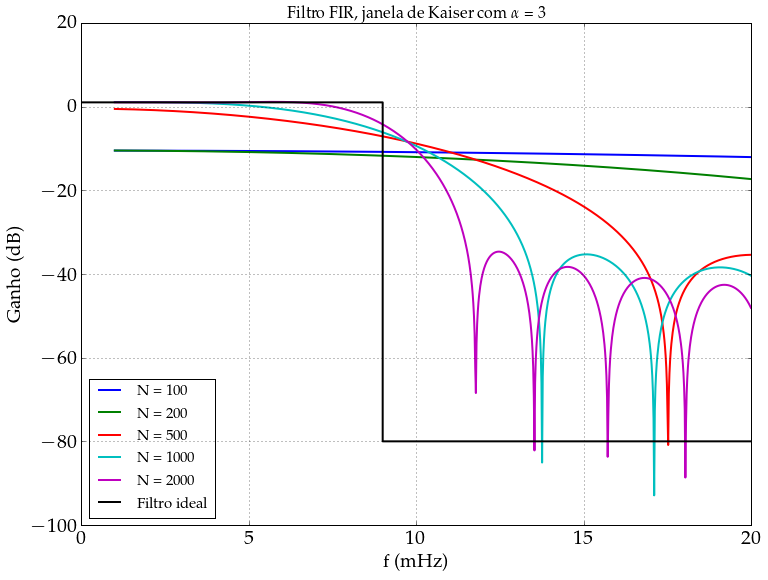

In [89]:
fig = plt.figure(1, figsize=(12,9))
freq_range = np.linspace(hz_to_sample(1e-3, sample_rate), hz_to_sample(20e-3, sample_rate), 1000)
leg = []

for tap_number in [100, 200, 500, 1000, 2000]:
    b = signal.firwin2(tap_number, freqs, gains, nyq=nyquist, window=('kaiser',3))
    w, h = signal.freqz(b, worN=freq_range)
    w = sample_to_hz(w, sample_rate)
    plt.plot(w * 1000, 20 * np.log10(abs(h)), linewidth=2)
    leg.append("N = {}".format(tap_number))

plt.plot(1000*np.array(f), g, 'k-', linewidth=2)
leg.append("Filtro ideal")
plt.grid()
plt.title("Filtro FIR, janela de Kaiser com $\\alpha$ = 3", fontsize=16)
plt.legend(leg, loc="best", fontsize=15)
plt.xlabel('f (mHz)', fontsize=19)
plt.ylabel('Ganho (dB)', fontsize=19)
plt.savefig('lowpass_FIR_kaiser_window.eps')

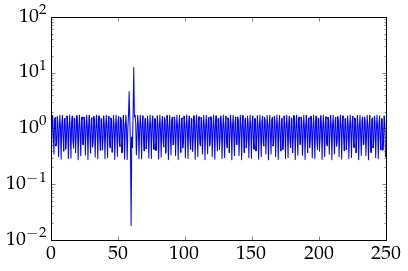

In [25]:

bpass = signal.remez(1500, [0, 58, 59, 61, 62, 250], [1, 0, 1],Hz=500)
freq, response = signal.freqz(bpass)
ampl = np.abs(response)
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.semilogy(500*freq/(2*np.pi), ampl, 'b-')  # freq in Hz